# K-nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
bigv = pd.read_csv("./data/data.csv")
bigv

,EXT,EST,AGR,CSN,OPN
0,4.6,2.4,3.5,3.0,4.5
1,2.0,2.5,4.2,3.7,3.5
2,2.5,2.6,4.0,3.2,4.1
3,2.6,2.9,3.6,2.5,3.9
4,2.9,1.9,4.2,4.4,4.8
...,...,...,...,...,...
1015336,3.4,3.3,3.6,2.9,3.3
1015337,3.2,4.4,3.7,2.8,4.5
1015338,3.9,2.9,3.1,2.1,4.8
1015339,2.2,3.5,3.7,3.6,4.1


In [3]:
nn = NearestNeighbors(n_neighbors=7)
nn.fit(bigv)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                 radius=1.0)

In [4]:
nn.kneighbors([bigv.loc[0]])[0]

array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.14142136,
        0.17320508, 0.17320508]])

Distance from the 7 nearest neighbors of first line

In [5]:
nn.kneighbors([bigv.loc[0]])[1]

array([[     0, 751705, 785383, 403662, 103728, 996332, 161494]])

Ids of 7 nearest neighbors of the first line, find your soul mate :)

In [6]:
bigv.loc[0]

EXT    4.6
EST    2.4
AGR    3.5
CSN    3.0
OPN    4.5
Name: 0, dtype: float64

In [7]:
bigv.loc[751705]

EXT    4.6
EST    2.4
AGR    3.5
CSN    3.0
OPN    4.4
Name: 751705, dtype: float64

#### Use KNN as a regressor (supervised learning)

It computes the average value of the k nearest neighbors

It follows the rule "You Are The Average Of The Five People You Spend The Most Time With"

In [8]:
happy = pd.read_csv("../supervised/data/happiness.csv", usecols=[1,2,3])

#dependent variable
y = happy['happy']

# explaining variables
X = happy[['temp', 'fish']]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
knn =  KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([1.85900699, 3.64950836, 3.35828184, 1.47472672, 0.57520026,
       3.58841281, 3.07126204, 3.2404273 , 1.47972108, 3.4364145 ,
       3.91498611, 1.00671653, 2.31147102, 4.24873252, 1.75645844,
       2.69242411, 2.24864302, 0.78187162, 1.46180293, 1.03513399,
       4.17501504, 1.74842779, 4.19471854, 3.70863182, 1.10988738,
       3.82412439, 1.11440775, 2.25095599, 3.4364145 , 1.78606132,
       2.44928155, 3.27798775, 0.6735942 , 3.96779011, 1.00671653,
       0.89724073, 3.69353551, 2.60173035, 3.02513584, 1.84404665,
       3.96779011, 3.18030986, 0.71591029, 4.2599754 , 1.53994151,
       0.71591029, 1.20639046, 3.22132881, 1.28724904, 3.76744438,
       1.8554546 , 3.02841906, 3.14482625, 1.39119106, 0.34656997,
       0.4494127 , 2.89242349, 1.54634386, 4.43166803, 3.98184428,
       1.69053596, 1.13810058, 3.45305999, 0.91626397, 3.38027861,
       2.37838271, 0.57520026, 4.33678757, 1.02940368, 1.43037327,
       3.69086771, 1.86879869, 3.48182541, 2.47932273, 3.61624

Mean Squared Error : 0.5597406864406961


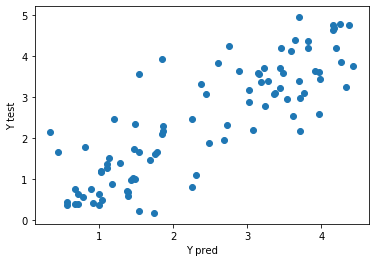

In [10]:
#our predictions
y_pred = knn.predict(X_test)

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()